In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from sanity_functions.Distributions import Distribution_Comparator

# Case I - Slightly different distributions

In [5]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing['data'], columns=housing['feature_names'])

# for i in range(0,4):
#   aux = df.add_suffix(str(i))
#   df= pd.concat([df,aux], ignore_index=True, axis=1)


m = df.shape[0]
n= df.shape[1]

X_1 = df.iloc[:int(m/2),:]
X_2 = df.iloc[int(m/2+1):,:]

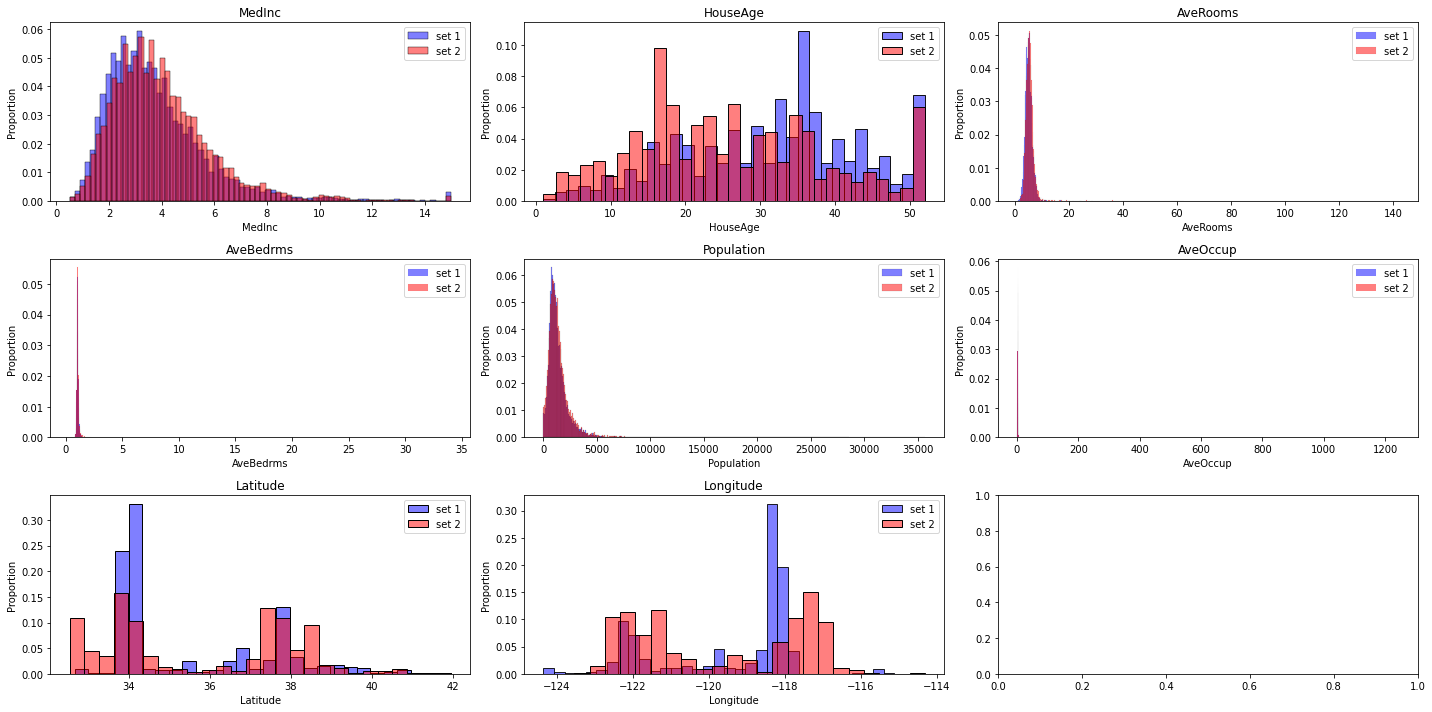

In [6]:
CD_analyser = Distribution_Comparator(seed=0, n_splits=5, export_results=True)
CD_analyser.fit(X_1,X_2)
CD_analyser.plot_distributions(kind='histogram')

In [7]:
CD_analyser.return_stats()

MedInc                    HouseAge                    AveRooms  \
              set 1         set 2         set 1         set 2         set 1   
count  10320.000000  10319.000000  10320.000000  10319.000000  10320.000000   
mean       3.742935      3.998091     31.577422     25.702491      5.243369   
std        1.918515      1.872157     11.883997     12.582531      2.776895   
min             NaN           NaN           NaN           NaN      0.846154   
25%        2.437100      2.690400     23.000000     16.000000      4.272312   
50%        3.358850      3.682700     33.000000     24.000000      5.049464   
75%        4.577025      4.905350     40.000000     34.000000      5.855981   
max             NaN           NaN           NaN           NaN    141.909091   

                        AveBedrms                  Population                \
              set 2         set 1         set 2         set 1         set 2   
count  10319.000000  10320.000000  10319.000000  10320.000000  10319.000000   
mean       5.614440      1.092374      1.100985   1389.142926   1461.790871   
std        2.112734      0.548192      0.385574   1090.604712   1171.808465   
min        1.130435      0.500000      0.333333      3.000000      5.000000   
25%        4.640074      1.006912      1.005175    777.000000    800.000000   
50%        5.395833      1.049449      1.048246   1134.000000   1200.000000   
75%        6.205261      1.097466      1.101978   1677.000000   1774.500000   
max       62.422222     34.066667     15.312500  28566.000000  35682.000000   

           AveOccup                    Latitude                   Longitude  \
              set 1         set 2         set 1         set 2         set 1   
count  10320.000000  10319.000000  10320.000000  10319.000000  10320.000000   
mean       3.056313      3.084973     35.488150     35.775759   -119.448078   
std        6.003969     13.405964      1.973459      2.278008      1.801141   
min        0.750000      0.692308     32.670000     32.540000   -124.350000   
25%        2.455019      2.403620     33.990000     33.750000   -121.240000   
50%        2.850339      2.791045     34.170000     35.280000   -118.400000   
75%        3.363548      3.211593     37.630000     37.750000   -118.190000   
max      599.714286   1243.333333           NaN           NaN   -114.550000   

                     
              set 2  
count  10319.000000  
mean    -119.691516  
std        2.180614  
min     -123.530000  
25%     -121.880000  
50%     -119.740000  
75%     -117.400000  
max     -114.310000

In [8]:
CD_analyser.concept_drift_detection()

,variable,ks_value,pvalue,accuracies
0,MedInc,0.0804,0.0000,0.538010
1,HouseAge,0.2452,0.0000,0.622607
2,AveRooms,0.1225,0.0000,0.561267
3,AveBedrms,0.0213,0.0184,0.509666
4,Population,0.0488,0.0000,0.523911
5,AveOccup,0.0634,0.0000,0.530889
6,Latitude,0.5259,0.0000,0.761423
7,Longitude,0.5747,0.0000,0.787344


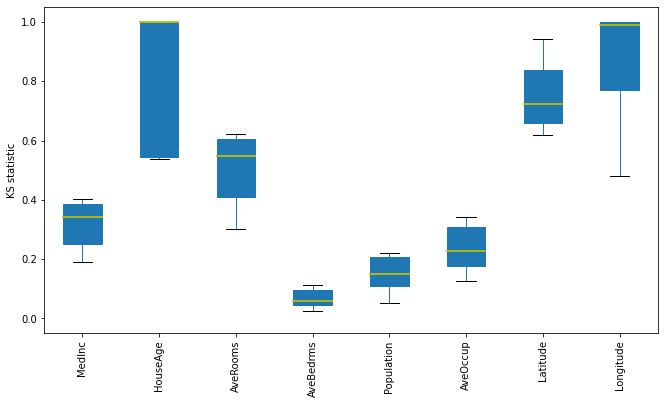

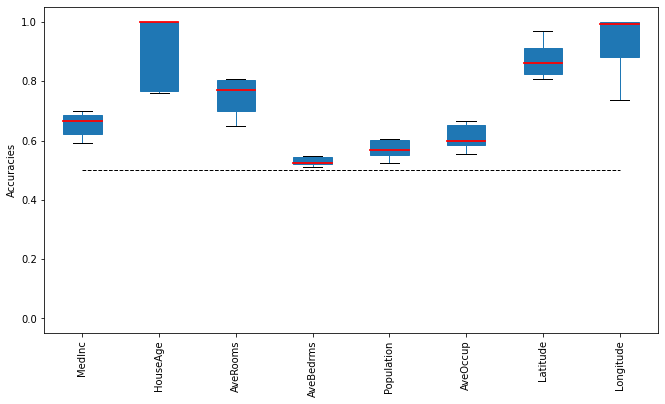

In [9]:
_ = CD_analyser.quantile_test();

# Case II - Same distribution

In [10]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

df = pd.DataFrame(housing['data'], columns=housing['feature_names'])

df = df.sample(frac=1)

m = df.shape[0]
n= df.shape[1]

X_1 = df.iloc[:int(m/2),:]
X_2 = df.iloc[int(m/2+1):,:]

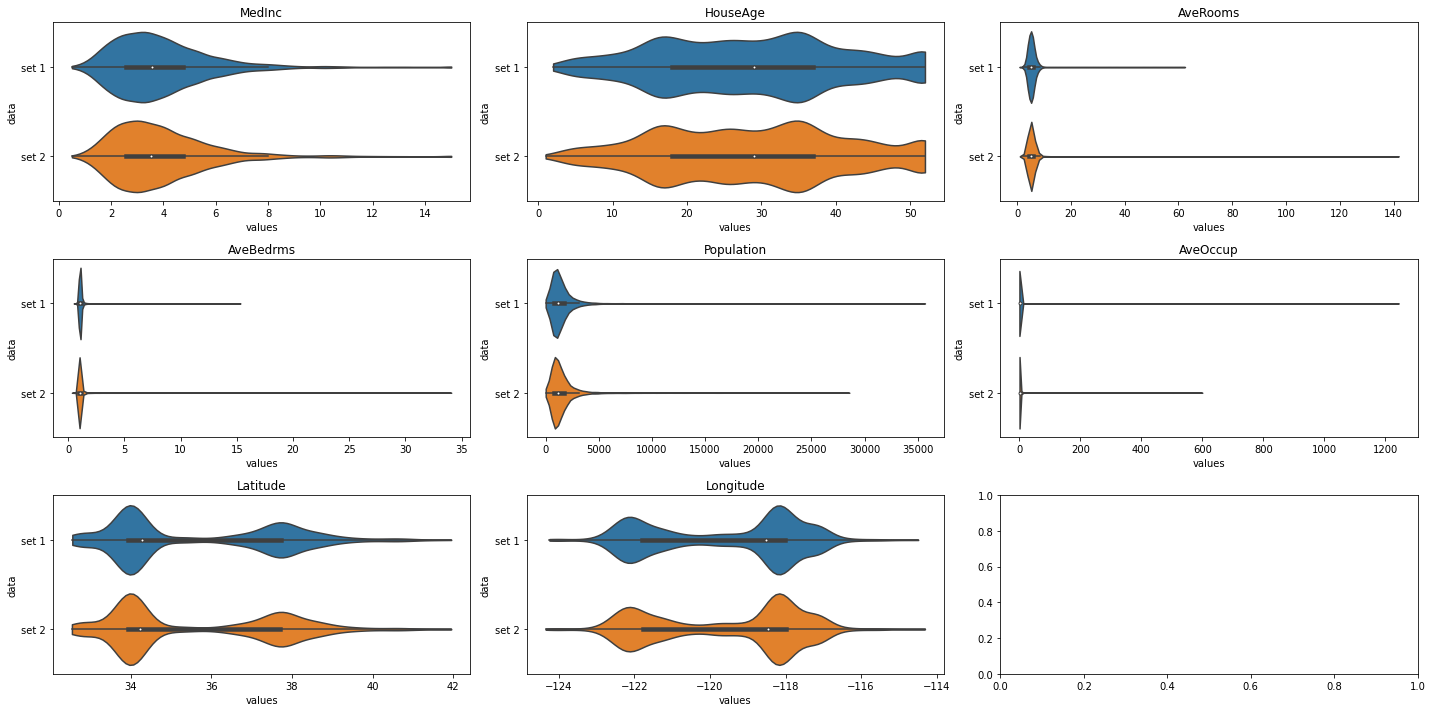

In [11]:
CD_analyser = Distribution_Comparator(seed=0, n_splits=5)
CD_analyser.fit(X_1,X_2)
CD_analyser.plot_distributions(kind='violin')

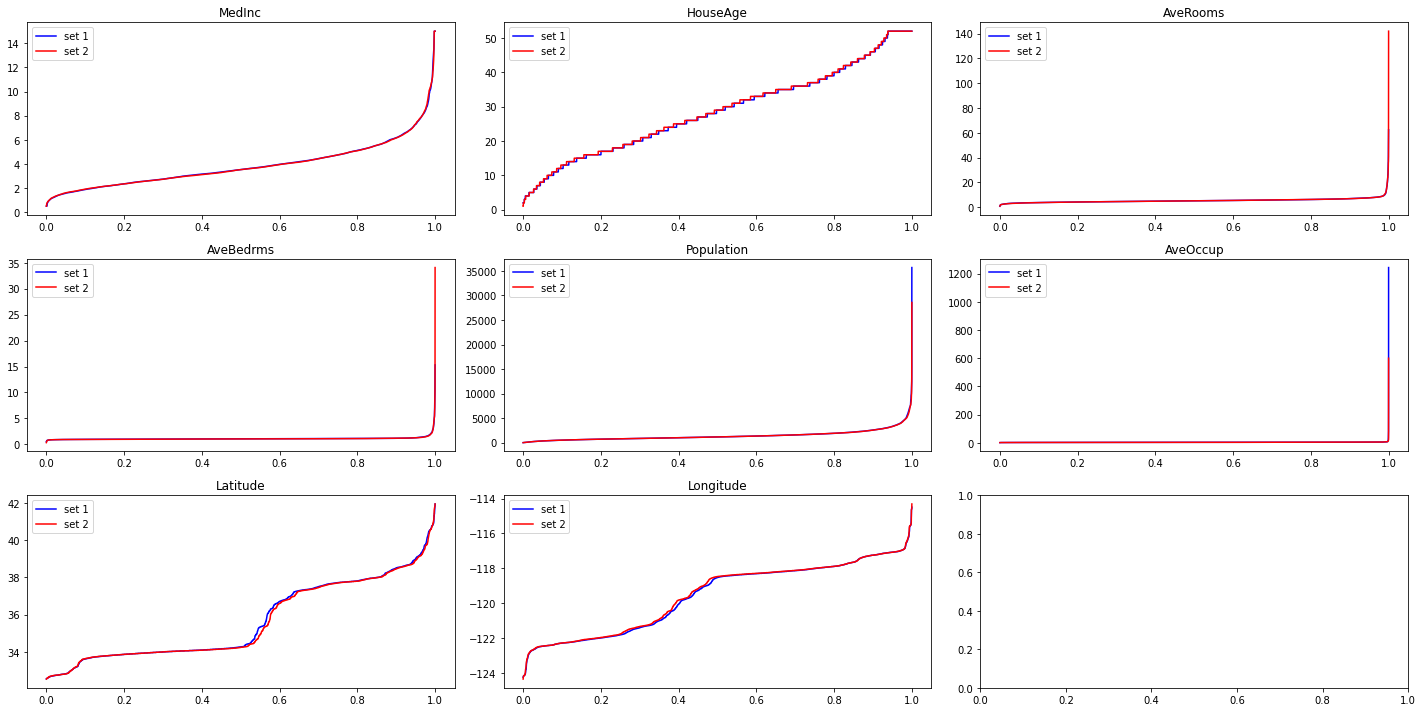

In [12]:
CD_analyser.plot_distributions(kind='ecdf')

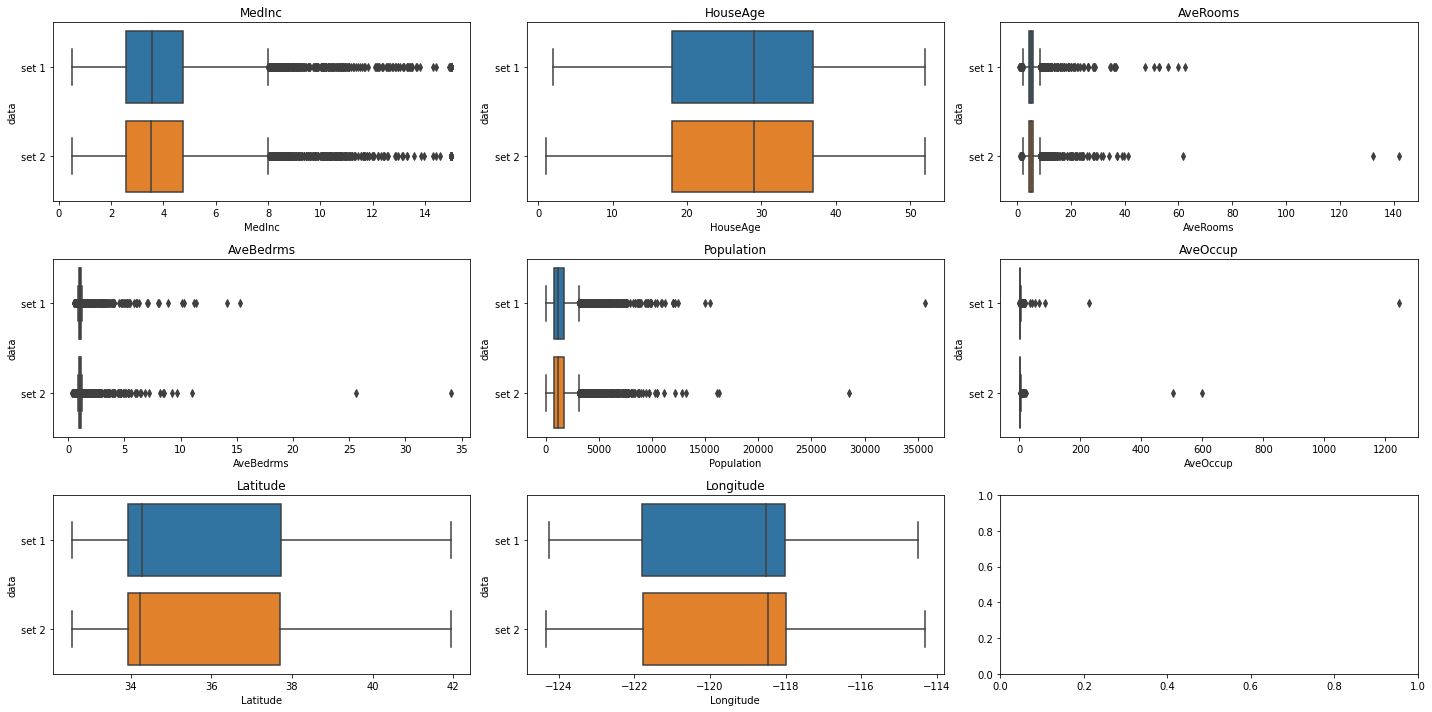

In [13]:
CD_analyser.plot_distributions(kind='boxplot')

In [14]:
CD_analyser.return_stats()

MedInc                    HouseAge                    AveRooms  \
              set 1         set 2         set 1         set 2         set 1   
count  10320.000000  10319.000000  10320.000000  10319.000000  10320.000000   
mean       3.874029      3.867517     28.536143     28.742417      5.436683   
std        1.901445      1.898262     12.593076     12.578335      2.216445   
min             NaN           NaN      2.000000      1.000000      0.846154   
25%        2.566375      2.562500           NaN           NaN      4.449005   
50%        3.546400      3.529400           NaN           NaN      5.240735   
75%        4.740250      4.746700           NaN           NaN      6.059318   
max             NaN           NaN           NaN           NaN     62.422222   

                        AveBedrms                  Population                \
              set 2         set 1         set 2         set 1         set 2   
count  10319.000000  10320.000000  10319.000000  10320.000000  10319.000000   
mean       5.421328      1.097362      1.095996   1431.063372   1419.954744   
std        2.707697      0.408392      0.531457   1158.640574   1105.726083   
min        1.000000      0.500000      0.333333      3.000000      6.000000   
25%        4.433358      1.006798      1.005000    787.750000    787.000000   
50%        5.218504      1.049367      1.048035   1167.000000   1166.000000   
75%        6.046147      1.100283      1.098665   1722.000000   1727.000000   
max      141.909091     15.312500     34.066667  35682.000000  28566.000000   

           AveOccup                    Latitude                  Longitude  \
              set 1         set 2         set 1         set 2        set 1   
count  10320.000000  10319.000000  10320.000000  10319.000000  10320.00000   
mean       3.093781      3.047515     35.651420     35.612057   -119.58933   
std       12.502186      7.710418      2.144539      2.127211      2.00893   
min        0.692308      1.060606     32.550000     32.540000   -124.25000   
25%        2.427258      2.432374           NaN           NaN   -121.81000   
50%        2.809473      2.827586     34.270000     34.240000   -118.52000   
75%        3.265165      3.299880     37.720000     37.710000   -118.01000   
max     1243.333333    599.714286           NaN           NaN   -114.49000   

                     
              set 2  
count  10319.000000  
mean    -119.549819  
std        1.997946  
min     -124.350000  
25%     -121.770000  
50%     -118.470000  
75%     -118.000000  
max     -114.310000

In [15]:
CD_analyser.concept_drift_detection()

,variable,ks_value,pvalue,accuracies
0,MedInc,0.0096,0.7203,0.504579
1,HouseAge,0.0092,0.7694,0.499298
2,AveRooms,0.0054,0.9979,0.500218
3,AveBedrms,0.0087,0.8220,0.497747
4,Population,0.0024,1.0000,0.500363
5,AveOccup,0.0143,0.2420,0.501090
6,Latitude,0.0041,1.0000,0.501914
7,Longitude,0.0081,0.8833,0.498086


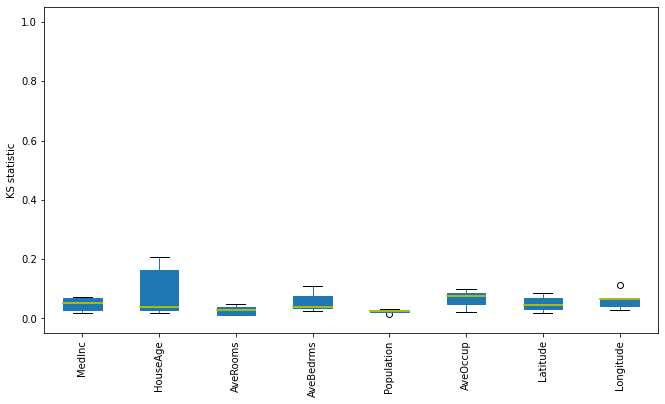

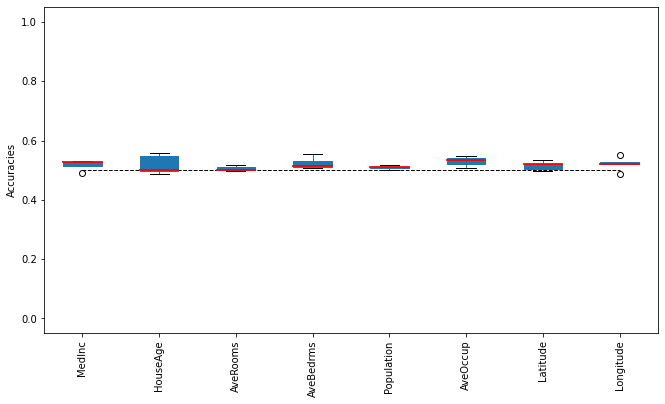

In [16]:
_ = CD_analyser.quantile_test();